In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os 
import torch
import torchvision 

### MNIST Dataset 

In [2]:
from sklearn.datasets import fetch_openml 

mnist = fetch_openml('mnist_784') 

In [2]:
data = torch.load("data.pt") 
labels = torch.load("labels.pt") 

In [3]:
mnist.data.shape

(70000, 784)

In [21]:
data = np.array(mnist.data).reshape(-1, 28, 28)

In [25]:
labels = np.array(mnist.target) 

In [36]:
labels.shape, type(labels)

((70000,), numpy.ndarray)

In [40]:
torch.save(torch.tensor(data).float(), "data.pt") 
torch.save(torch.tensor(labels.astype(np.int)), "labels.pt") 

C:\Users\STEPHE~1\AppData\Local\Temp/ipykernel_4204/1310947755.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  torch.save(torch.tensor(labels.astype(np.int)), "labels.pt")


### EDA 

In [3]:
import matplotlib.pyplot as plt

# sample = data[0]
# # show the data
# plt.imshow(sample, cmap='gray', interpolation='none')
# print("Label: "+ str(labels[0]))
# print(sample.shape)

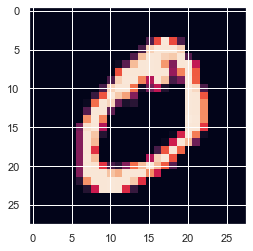

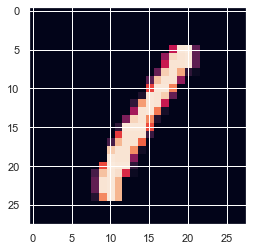

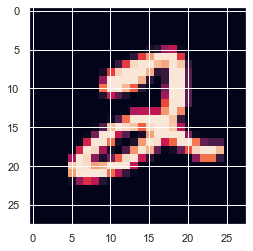

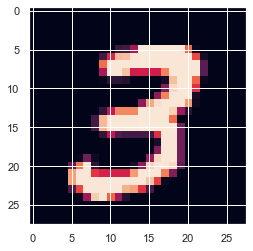

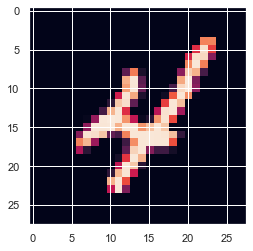

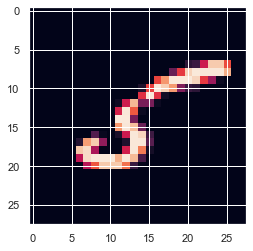

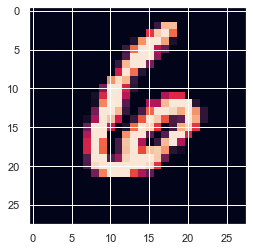

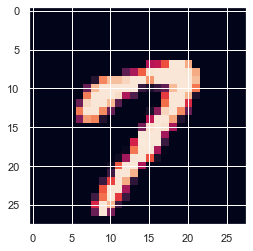

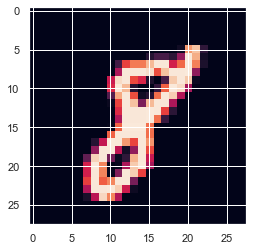

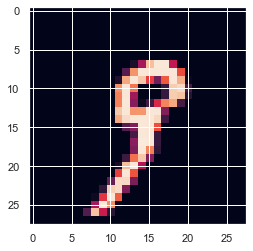

In [4]:
label = 0
for i in range(labels.shape[0]): 
    if label < 10 and labels[i] == label: 
        plt.imshow(data[i])
        plt.show()
        label += 1 

### Data Processing (with/without PCA) 

In [94]:
X = np.array(data).reshape(-1, 784) 
y = np.array(labels) 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size = 0.125, random_state = 42) 

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit on training set only.
scaler.fit(X_train) 

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval) 
X_test = scaler.transform(X_test)

In [234]:
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X, y, test_size = 0.2, random_state = 42) 
X_train_transformed, X_eval_transformed, y_train_transformed, y_eval_transformed = train_test_split(X_train_transformed, y_train_transformed, test_size = 0.125, random_state = 42) 

In [235]:
scaler = StandardScaler() 
scaler.fit(X_train_transformed) 

# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train_transformed)
X_eval_transformed = scaler.transform(X_eval_transformed) 
X_test_transformed = scaler.transform(X_test_transformed)

In [288]:
18 ** 2 

324

In [289]:
from sklearn.decomposition import PCA 

pca = PCA(324) 
pca.fit(X_train_transformed)
X_train_transformed = pca.transform(X_train_transformed)
X_eval_transformed = pca.transform(X_eval_transformed) 
X_test_transformed = pca.transform(X_test_transformed)

In [290]:
X_train_transformed.shape 

(49000, 324)

Text(0, 0.5, 'Principal Component 2')

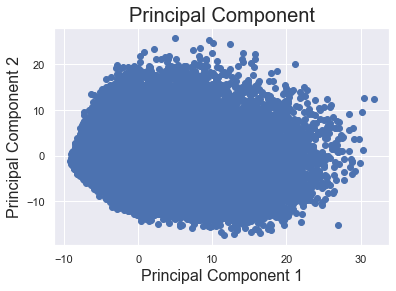

In [291]:
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1]) 
plt.title("Principal Component", fontsize = 20) 
plt.xlabel("Principal Component 1", fontsize = 16)
plt.ylabel("Principal Component 2", fontsize = 16) 

### Model 

In [292]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver = 'lbfgs') 
model.fit(X_train, y_train) 

C:\Users\Stephen Ma\anaconda3\envs\env_pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [293]:
training_error = model.score(X_train, y_train) 
eval_error = model.score(X_eval, y_eval) 
test_error = model.score(X_test, y_test) 

In [294]:
# model performance without PCA 

training_error, eval_error, test_error 

(0.9468367346938775, 0.9114285714285715, 0.9126428571428571)

In [295]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver = 'lbfgs') 
model.fit(X_train_transformed, y_train_transformed) 

C:\Users\Stephen Ma\anaconda3\envs\env_pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [296]:
training_error = model.score(X_train_transformed, y_train_transformed) 
eval_error = model.score(X_eval_transformed, y_eval_transformed) 
test_error = model.score(X_test_transformed, y_test_transformed) 

In [297]:
# model performance with PCA 

training_error, eval_error, test_error 

(0.936469387755102, 0.9205714285714286, 0.9222142857142858)

### Neural Net 

#### MLP without PCA 

In [108]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset 

In [109]:
training_set = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).long()) 
eval_set = TensorDataset(torch.tensor(X_eval).float(), torch.tensor(y_eval).long()) 
test_set = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).long()) 

In [63]:
len(X_train), X_train[0][0].shape, X_train[0][1].shape 

(49000, (), ())

In [64]:
train_loader = DataLoader(training_set, batch_size = 256, shuffle=True, pin_memory=True) 
eval_loader = DataLoader(eval_set, batch_size = 512, shuffle=False, pin_memory=True) 
test_loader = DataLoader(test_set, batch_size = 512, shuffle=False, pin_memory=True) 

In [242]:
def train_epoch(model, train_loader, optimizer, criterion): 
    preds = []
    trues = []
    training_loss = [] 
    count = 0
    model.train()
    for X, y in train_loader: 
        X, y = X.to(device), y.unsqueeze(dim=1).to(device)
        pred = model(X) 
        
        loss = 0
#         print(pred.shape, y.shape)
        loss = criterion(pred, y.squeeze(1))
        training_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return preds, trues, np.mean(training_loss) 

In [243]:
def eval_epoch(model, val_loader, criterion): 
    preds = []
    trues = []
    eval_loss = []
    
    model.eval()
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.unsqueeze(dim=1).to(device)
            pred = model(X)
            
            loss = 0
            loss = criterion(pred, y.squeeze(1)) 
            eval_loss.append(loss.item()) 
            
    return preds, trues, np.mean(eval_loss) 

In [244]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module): 
    def __init__(self, input_dim = 784, hidden_dim = 1024, output_dim = 10): 
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), 
            nn.ReLU(inplace=True), 
            nn.Linear(hidden_dim, hidden_dim), 
            nn.ReLU(inplace=True), 
            nn.Linear(hidden_dim, hidden_dim), 
            nn.ReLU(inplace=True), 
            nn.Linear(hidden_dim, output_dim) 
        )
        
    def forward(self, x): 
        output = self.model(x) 

        return output

In [68]:
import time 
device = "cuda" 

model = MLP(784, 1024, 10).to(device)
num_epoch = 200
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=0.95)

print(sum(p.numel() for p in model.parameters() if p.requires_grad))
best_loss = 10000   
train_losses = []
val_losses = [] 

for epoch in range(1, num_epoch + 1): 
    start = time.time()
    train_loss = train_epoch(model, train_loader, optimizer, criterion)[-1]
    train_losses.append(train_loss)
    _, _, val_loss = eval_epoch(model, eval_loader, criterion) 
    val_losses.append(val_loss)
    if val_loss <= best_loss: 
        best_loss = val_loss 
        best_model = model 
    end = time.time()
    print("Epoch:", epoch, "completed in:", (end - start), "s. Training loss:", train_loss, ". Val loss:", val_loss) 
    if (len(train_losses) > 50 and np.mean(val_losses[-5:]) >= np.mean(val_losses[-10:-5])):
        break
    scheduler.step() 

2913290
Epoch: 1 completed in: 1.622004747390747 s. Training loss: 0.6798152324433128 . Val loss: 0.30449103138276506
Epoch: 2 completed in: 0.7601006031036377 s. Training loss: 0.2512054826753835 . Val loss: 0.24979184355054582
Epoch: 3 completed in: 0.7495417594909668 s. Training loss: 0.21328861080110073 . Val loss: 0.235512270459107
Epoch: 4 completed in: 0.7479989528656006 s. Training loss: 0.19411137987238666 . Val loss: 0.17576483264565468
Epoch: 5 completed in: 0.7865848541259766 s. Training loss: 0.1714003044568623 . Val loss: 0.21600535299096787
Epoch: 6 completed in: 0.7841513156890869 s. Training loss: 0.1614397146816676 . Val loss: 0.16904872176902636
Epoch: 7 completed in: 0.7791366577148438 s. Training loss: 0.15173795920175812 . Val loss: 0.19767059172902787
Epoch: 8 completed in: 0.7439877986907959 s. Training loss: 0.14033399085747078 . Val loss: 0.15462947743279593
Epoch: 9 completed in: 0.7740020751953125 s. Training loss: 0.13717819957916313 . Val loss: 0.159027283

In [69]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in training_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t)
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [70]:
count / len(training_set)

0.9994489795918368

In [71]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in eval_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t)
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [72]:
count / len(eval_set)

0.975

In [73]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in test_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t)
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [75]:
count / len(test_set) 

0.9742142857142857

#### MLP with PCA 

In [298]:
training_set = TensorDataset(torch.tensor(X_train_transformed).float(), torch.tensor(y_train_transformed).long()) 
eval_set = TensorDataset(torch.tensor(X_eval_transformed).float(), torch.tensor(y_eval_transformed).long()) 
test_set = TensorDataset(torch.tensor(X_test_transformed).float(), torch.tensor(y_test_transformed).long()) 

In [299]:
train_loader = DataLoader(training_set, batch_size = 256, shuffle=True, pin_memory=True) 
eval_loader = DataLoader(eval_set, batch_size = 512, shuffle=False, pin_memory=True) 
test_loader = DataLoader(test_set, batch_size = 512, shuffle=False, pin_memory=True) 

In [301]:
import time 
device = "cuda" 

model = MLP(324, 1024, 10).to(device)
num_epoch = 200
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=0.95)

print(sum(p.numel() for p in model.parameters() if p.requires_grad))
best_loss = 10000   
train_losses = []
val_losses = [] 

for epoch in range(1, num_epoch + 1): 
    start = time.time()
    train_loss = train_epoch(model, train_loader, optimizer, criterion)[-1]
    train_losses.append(train_loss)
    _, _, val_loss = eval_epoch(model, eval_loader, criterion) 
    val_losses.append(val_loss)
    if val_loss <= best_loss: 
        best_loss = val_loss 
        best_model = model 
    end = time.time()
    print("Epoch:", epoch, "completed in:", (end - start), "s. Training loss:", train_loss, ". Val loss:", val_loss) 
    if (len(train_losses) > 50 and np.mean(val_losses[-5:]) >= np.mean(val_losses[-10:-5])):
        break
    scheduler.step() 

2442250
Epoch: 1 completed in: 0.9592204093933105 s. Training loss: 0.6880740912553543 . Val loss: 0.2704936159508569
Epoch: 2 completed in: 0.7574760913848877 s. Training loss: 0.2338475714204833 . Val loss: 0.22246294894388743
Epoch: 3 completed in: 0.7369985580444336 s. Training loss: 0.19976330505839238 . Val loss: 0.18850477093032428
Epoch: 4 completed in: 0.8150017261505127 s. Training loss: 0.18003171515495828 . Val loss: 0.19164241211754934
Epoch: 5 completed in: 0.7440967559814453 s. Training loss: 0.1536707974349459 . Val loss: 0.17561946383544377
Epoch: 6 completed in: 0.7479994297027588 s. Training loss: 0.14032440547210476 . Val loss: 0.14550576199378287
Epoch: 7 completed in: 0.7565813064575195 s. Training loss: 0.1280452562496066 . Val loss: 0.16496295375483377
Epoch: 8 completed in: 0.771425724029541 s. Training loss: 0.13412803341634572 . Val loss: 0.20036261156201363
Epoch: 9 completed in: 0.755000114440918 s. Training loss: 0.10976522623483713 . Val loss: 0.141212975

In [302]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in training_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t)
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [303]:
count / len(training_set) 

0.9994489795918368

In [304]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in eval_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t)
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [305]:
count / len(eval_set) 

0.9794285714285714

In [306]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in test_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t)
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [307]:
count / len(test_set) 

0.9765

#### CNN without PCA 

In [308]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):  
    def __init__(self, p = 0.02): 
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 8, 5, padding = 2), # 28x28x8
            nn.MaxPool2d(2, 2), # 14x14x8
            nn.ReLU(inplace = True), 
            nn.Dropout2d(p=p), 
            nn.Conv2d(8, 16, 5, padding = 2), # 14x14x16
            nn.MaxPool2d(2, 2), # 7x7x16
            nn.ReLU(inplace = True), 
            nn.Dropout2d(p=p)
        )
        self.fc = nn.Sequential(
            nn.Linear(7 * 7 * 16, 128), 
            nn.Dropout(p=p),
            nn.ReLU(inplace = True), 
            nn.Dropout(p=p), 
            nn.Linear(128, 10)
        )
        
    
    def forward(self, x): 
        x = x.unsqueeze(1)
        x = self.features(x)
        x = x.view(-1, 7 * 7 * 16) # x.size()[0]
        x = self.fc(x)
        return x

In [309]:
training_set = TensorDataset(torch.tensor(X_train).reshape(-1, 28, 28).float(), torch.tensor(y_train).long()) 
eval_set = TensorDataset(torch.tensor(X_eval).reshape(-1, 28, 28).float(), torch.tensor(y_eval).long()) 
test_set = TensorDataset(torch.tensor(X_test).reshape(-1, 28, 28).float(), torch.tensor(y_test).long())  

In [310]:
train_loader = DataLoader(training_set, batch_size = 256, shuffle=True, pin_memory=True) 
eval_loader = DataLoader(eval_set, batch_size = 512, shuffle=False, pin_memory=True) 
test_loader = DataLoader(test_set, batch_size = 512, shuffle=False, pin_memory=True) 

In [311]:
import time 
device = "cuda" 

model = CNN().to(device)
num_epoch = 200
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=0.95)

print(sum(p.numel() for p in model.parameters() if p.requires_grad))
best_loss = 10000   
train_losses = []
val_losses = [] 

for epoch in range(1, num_epoch + 1): 
    start = time.time()
    train_loss = train_epoch(model, train_loader, optimizer, criterion)[-1]
    train_losses.append(train_loss)
    _, _, val_loss = eval_epoch(model, eval_loader, criterion) 
    val_losses.append(val_loss)
    if val_loss <= best_loss: 
        best_loss = val_loss 
        best_model = model 
    end = time.time()
    print("Epoch:", epoch, "completed in:", (end - start), "s. Training loss:", train_loss, ". Val loss:", val_loss) 
    if (len(train_losses) > 50 and np.mean(val_losses[-5:]) >= np.mean(val_losses[-10:-5])):
        break
    scheduler.step() 

105194
Epoch: 1 completed in: 1.103886365890503 s. Training loss: 0.22330787369476943 . Val loss: 0.10258512544844832
Epoch: 2 completed in: 0.9501070976257324 s. Training loss: 0.09019898711509693 . Val loss: 0.08538408258131572
Epoch: 3 completed in: 0.843982458114624 s. Training loss: 0.07904374344313207 . Val loss: 0.08161249038364206
Epoch: 4 completed in: 0.8535957336425781 s. Training loss: 0.07199254177006272 . Val loss: 0.06567794004721302
Epoch: 5 completed in: 0.8565542697906494 s. Training loss: 0.06959456778713502 . Val loss: 0.05865971823888166
Epoch: 6 completed in: 0.8830013275146484 s. Training loss: 0.06206468812403424 . Val loss: 0.06133293839437621
Epoch: 7 completed in: 0.9165799617767334 s. Training loss: 0.060366685710808575 . Val loss: 0.07212417599345956
Epoch: 8 completed in: 0.9190008640289307 s. Training loss: 0.058936603847541846 . Val loss: 0.05546560111854758
Epoch: 9 completed in: 0.8670845031738281 s. Training loss: 0.056018225882629245 . Val loss: 0.07

In [318]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in training_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t.unsqueeze(0))
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [319]:
count / len(training_set) 

0.9983061224489795

In [320]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in eval_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t.unsqueeze(0))
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [321]:
count / len(eval_set) 

0.9912857142857143

In [322]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in test_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t.unsqueeze(0))
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [323]:
count / len(test_set) 

0.9892142857142857

#### CNN with PCA 

In [324]:
X_train_transformed.shape

(49000, 324)

In [325]:
training_set = TensorDataset(torch.tensor(X_train_transformed).reshape(-1, 18, 18).float(), torch.tensor(y_train_transformed).long()) 
eval_set = TensorDataset(torch.tensor(X_eval_transformed).reshape(-1, 18, 18).float(), torch.tensor(y_eval_transformed).long()) 
test_set = TensorDataset(torch.tensor(X_test_transformed).reshape(-1, 18, 18).float(), torch.tensor(y_test_transformed).long()) 

In [326]:
train_loader = DataLoader(training_set, batch_size = 256, shuffle=True, pin_memory=True) 
eval_loader = DataLoader(eval_set, batch_size = 512, shuffle=False, pin_memory=True) 
test_loader = DataLoader(test_set, batch_size = 512, shuffle=False, pin_memory=True) 

In [337]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):  
    def __init__(self, p = 0.02): 
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 20, 5, padding = 2), # 18x18x8
            nn.MaxPool2d(2, 2), # 14x14x8
            nn.ReLU(inplace = True), 
            nn.Dropout2d(p=p), 
            nn.Conv2d(20, 40, 5, padding = 2), # 9x9x16
            nn.MaxPool2d(2, 2), # 4x4x16
            nn.ReLU(inplace = True), 
            nn.Dropout2d(p=p)
        )
        self.fc = nn.Sequential(
            nn.Linear(4 * 4 * 40, 512), 
            nn.Dropout(p=p),
            nn.ReLU(inplace = True), 
            nn.Dropout(p=p), 
            nn.Linear(512, 10)
        )
        
    
    def forward(self, x): 
        x = x.unsqueeze(1)
        x = self.features(x) 
        x = x.view(-1, 4 * 4 * 40) # x.size()[0]
        x = self.fc(x)
        return x

In [352]:
import time 
device = "cuda" 

model = CNN().to(device)
num_epoch = 200
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=0.95)

print(sum(p.numel() for p in model.parameters() if p.requires_grad))
best_loss = 10000   
train_losses = []
val_losses = [] 

for epoch in range(1, num_epoch + 1): 
    start = time.time()
    train_loss = train_epoch(model, train_loader, optimizer, criterion)[-1]
    train_losses.append(train_loss)
    _, _, val_loss = eval_epoch(model, eval_loader, criterion) 
    val_losses.append(val_loss)
    if val_loss <= best_loss: 
        best_loss = val_loss 
        best_model = model 
    end = time.time()
    print("Epoch:", epoch, "completed in:", (end - start), "s. Training loss:", train_loss, ". Val loss:", val_loss) 
    if (len(train_losses) > 50 and np.mean(val_losses[-5:]) >= np.mean(val_losses[-10:-5])):
        break
    scheduler.step() 

353882
Epoch: 1 completed in: 1.0275154113769531 s. Training loss: 0.7979131805865715 . Val loss: 0.33545692903654917
Epoch: 2 completed in: 0.875011682510376 s. Training loss: 0.2770959425251931 . Val loss: 0.24793063955647604
Epoch: 3 completed in: 0.8989882469177246 s. Training loss: 0.19987868804795048 . Val loss: 0.21640491698469436
Epoch: 4 completed in: 0.877356767654419 s. Training loss: 0.16677735028012344 . Val loss: 0.22625399380922318
Epoch: 5 completed in: 0.8669993877410889 s. Training loss: 0.14558239129837602 . Val loss: 0.17544688710144588
Epoch: 6 completed in: 0.8528101444244385 s. Training loss: 0.12555718165822327 . Val loss: 0.17460972922188894
Epoch: 7 completed in: 0.9179880619049072 s. Training loss: 0.11778396523247163 . Val loss: 0.17737702652812004
Epoch: 8 completed in: 0.8751299381256104 s. Training loss: 0.10687314352253452 . Val loss: 0.17108470254710742
Epoch: 9 completed in: 0.8509976863861084 s. Training loss: 0.09993228079595913 . Val loss: 0.1700580

In [353]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in training_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t.unsqueeze(0))
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [354]:
count / len(training_set) 

0.9988367346938776

In [355]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in eval_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t.unsqueeze(0))
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [356]:
count / len(eval_set) 

0.9617142857142857

In [357]:
preds = [] 
count = 0
with torch.no_grad():
    for X_t, y_t in test_set: 
        X_t, y_t = X_t.to(device), y_t.to(device)
        y_hat = model(X_t.unsqueeze(0))
#         preds.append(y_hat.argmax().item())
        if (y_hat.argmax().item() == y_t): count += 1 

In [358]:
count / len(test_set) 

0.9617142857142857